In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
res_dirs = ['random_sub1/', 'subset_sigalpha/', 'subset_1chain/']

## Check stage1 and stage2 correlation of thetas

In [14]:
u = ['us155350',
     'us36718',
     'us223905',
     'us203991',
     'us152094']

s2_theta = pd.read_csv('../samples_theta_stage2.csv', index_col=0)
s2_theta = s2_theta.iloc[:, 1000:].mean(axis=1)

for r_dir in res_dirs:
    s1_theta = pd.read_csv(r_dir + 'samples_theta.csv', index_col=0)
    s1_theta = s1_theta.mean(axis=0)
    users = [usr for usr in u if usr in s1_theta.index]
    
    s1_theta = s1_theta.loc[users]
    s2_theta_users = s2_theta.loc[users]
    corr = np.corrcoef(s1_theta, s2_theta_users)[0,1]
    print("### Dir: {}###\n\t Corr: {}".format(r_dir, corr))


### Dir: random_sub1/###
	 Corr: 0.6564804078426915
### Dir: subset_sigalpha/###
	 Corr: -0.8056153093863226
### Dir: subset_1chain/###
	 Corr: 0.5987810669540932


## Check phis

In [15]:
barb_samples_phi = pd.read_csv("../barbera_data/samples_phi.csv")
barb_phi = barb_samples_phi.mean(axis=0)
to_remove = ['pedropierluisi', 'EleanorNorton']
barb_phi = barb_phi.drop('phi.115', axis=0)
barb_phi = barb_phi.drop('phi.177', axis=0)
names = pd.read_csv("../barbera_data/samples_names.csv")

In [24]:
phis = []
for r_dir in res_dirs:
    samples_phi = pd.read_csv(r_dir + "samples_phi.csv")
    phi = samples_phi.mean(axis=0)
    phis.append(phi)
    print("### Dir: {} ###\n\t Mean: {}\n\tCorr: {}".format(r_dir.rstrip('/'), phi.mean(), np.corrcoef(phi, barb_phi)[0,1]))
    #samples_mu_phi = pd.read_csv("samples_mu_phi.csv")
    #samples_sigma_phi = pd.read_csv("samples_sigma_phi.csv")

### Dir: random_sub1 ###
	 Mean: 0.024204939974317358
	Corr: -0.06578001264313317
### Dir: subset_sigalpha ###
	 Mean: 0.055063496366557746
	Corr: 0.09925780202751162
### Dir: subset_1chain ###
	 Mean: -0.497413047507151
	Corr: -0.07628284042990174


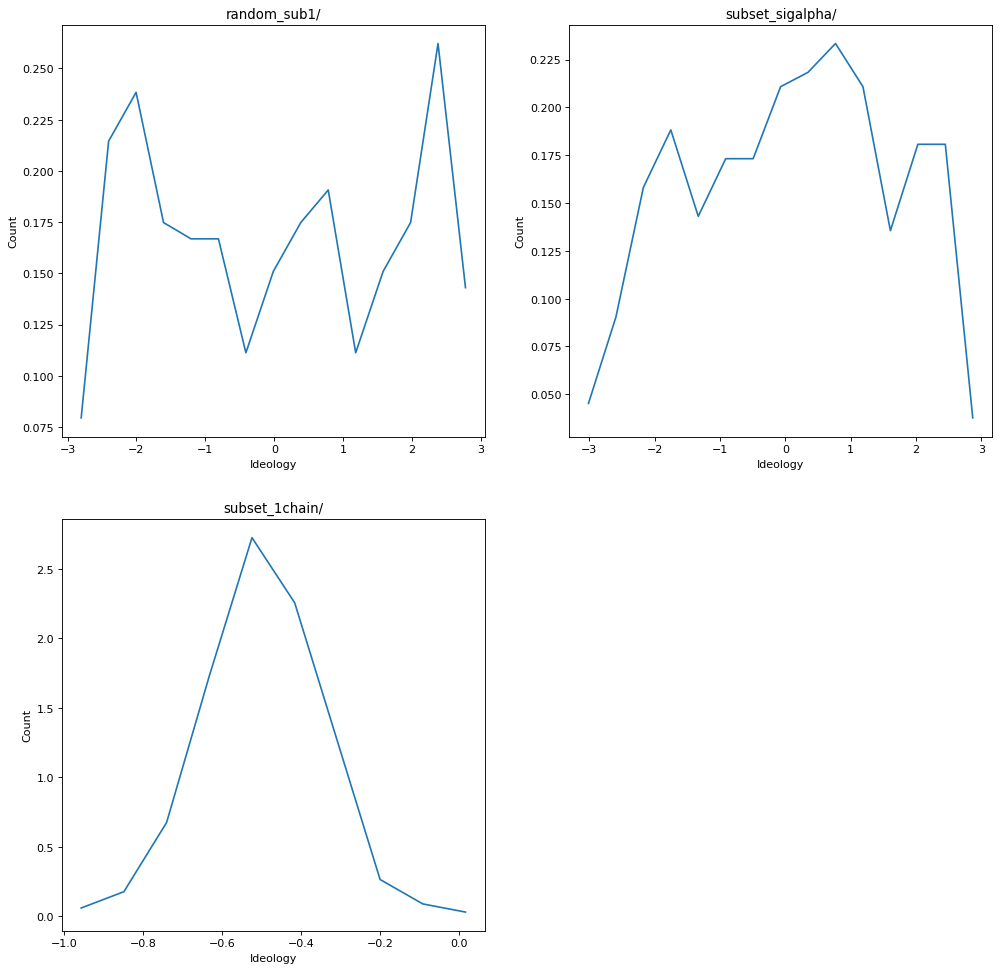

In [32]:
plt.figure(figsize=(15,15), dpi=80)

plt.subplot(221)
y,binEdges=np.histogram(phis[0], bins=15, density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.title(res_dirs[0])
plt.xlabel("Ideology")
plt.ylabel("Count")

plt.subplot(222)
y,binEdges=np.histogram(phis[1], bins=15, density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.title(res_dirs[1])
plt.xlabel("Ideology")
plt.ylabel("Count")

plt.subplot(223)
y,binEdges=np.histogram(phis[2], bins=10, density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.title(res_dirs[2])
plt.xlabel("Ideology")
plt.ylabel("Count")


plt.show()

In [28]:
vip = [
    'glennbeck',
    'FoxNews',
    'MittRomney',
    'SarahPalinUSA',
    'newtgingrich',
    'nytimes',
    'algore',
    'BarackObama',
    'maddow'
]


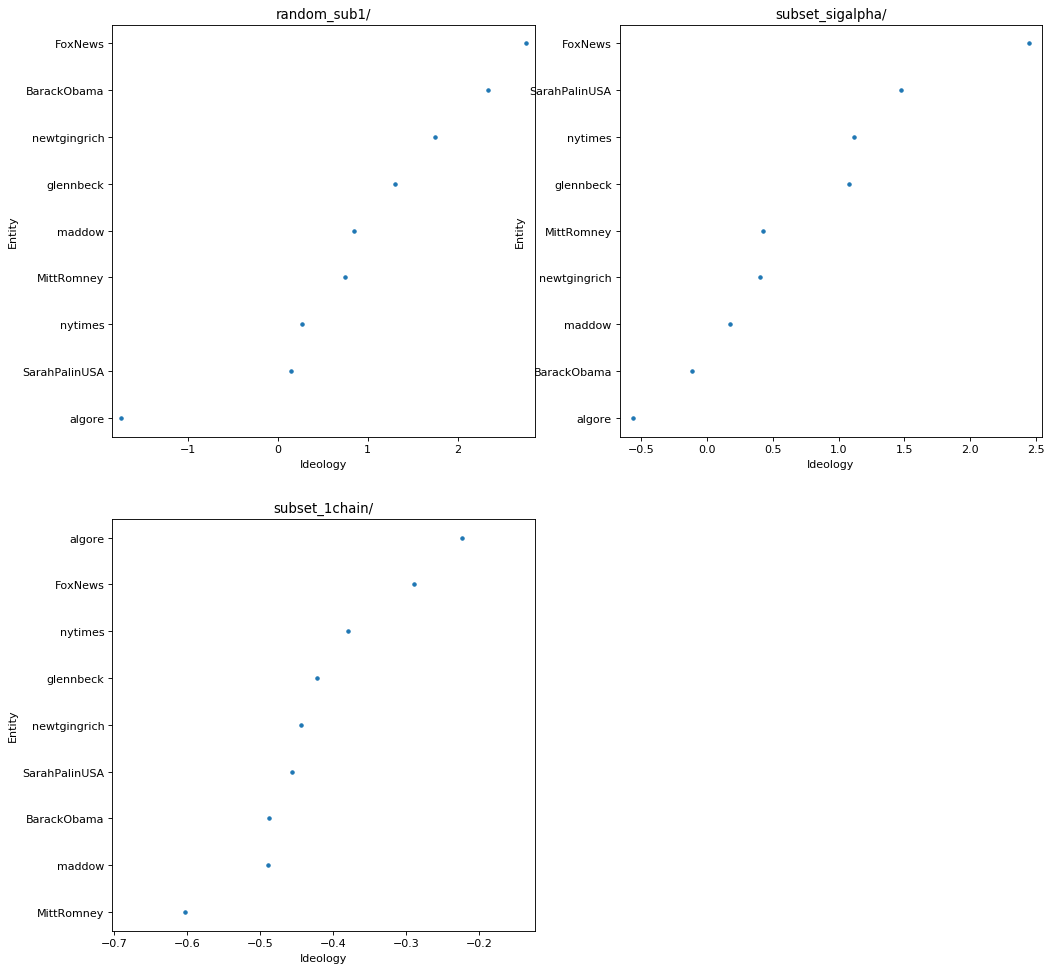

In [31]:
plt.figure(figsize=(15,15), dpi=80)

plt.subplot(221)
sort = phis[0][vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title(res_dirs[0])
plt.xlabel("Ideology")
plt.ylabel("Entity")
plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)
plt.yticks(np.arange(len(vip)), y_labels)

plt.subplot(222)
sort = phis[1][vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title(res_dirs[1])
plt.xlabel("Ideology")
plt.ylabel("Entity")
plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)
plt.yticks(np.arange(len(vip)), y_labels)

plt.subplot(223)
sort = phis[2][vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title(res_dirs[2])
plt.xlabel("Ideology")
plt.ylabel("Entity")
plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)
plt.yticks(np.arange(len(vip)), y_labels)

plt.show()

In [55]:
samples_sigma_alpha = pd.read_csv("samples_sigma_alpha.csv")
samples_alpha = pd.read_csv("samples_alpha.csv")

In [56]:
sigma_alpha = samples_sigma_alpha.mean(axis=0)
alpha = samples_alpha.mean(axis=0)
print(alpha.mean())
print(sigma_alpha.mean())

-1.11507921835
1.14243362275
